In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/Covid.csv")

df

# We shall be performing Data analysis to predict the number of deaths

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [47]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [49]:
# Changes the data type form Object to Datetime

df["Date"]=pd.to_datetime(df["Date"])

In [50]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [45]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


# Checking NAN values

In [15]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

NO NAN values present

# Checking for ?

In [16]:
(df == '?').sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [51]:
# Separating month from the date

df_new = pd.DataFrame()

df_new["Month"] = df["Date"].dt.month_name()
df_new["Country"] = df["Country"]
df_new["Confirmed"] = df["Confirmed"]
df_new["Recovered"] = df["Recovered"]
df_new["Deaths"] = df["Deaths"]

df_new

,Month,Country,Confirmed,Recovered,Deaths
0,January,Afghanistan,0,0,0
1,January,Albania,0,0,0
2,January,Algeria,0,0,0
3,January,Andorra,0,0,0
4,January,Angola,0,0,0
...,...,...,...,...,...
23683,May,West Bank and Gaza,429,365,3
23684,May,Western Sahara,9,6,1
23685,May,Yemen,249,10,49
23686,May,Zambia,920,336,7


# Univarient Analysis

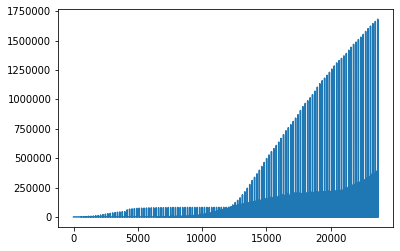

In [60]:
df_new["Confirmed"].plot()

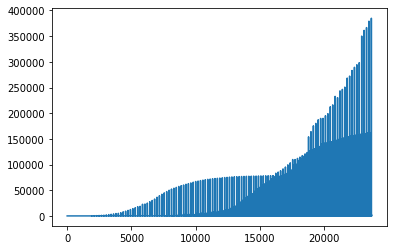

In [61]:
df_new["Recovered"].plot()

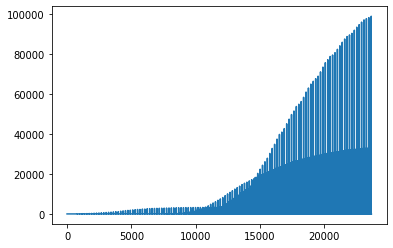

In [62]:
df_new["Deaths"].plot()

Recovery rate is increasing
Death rate is increased gradually intially then there is a sharp increase

# Bivariant Analysis

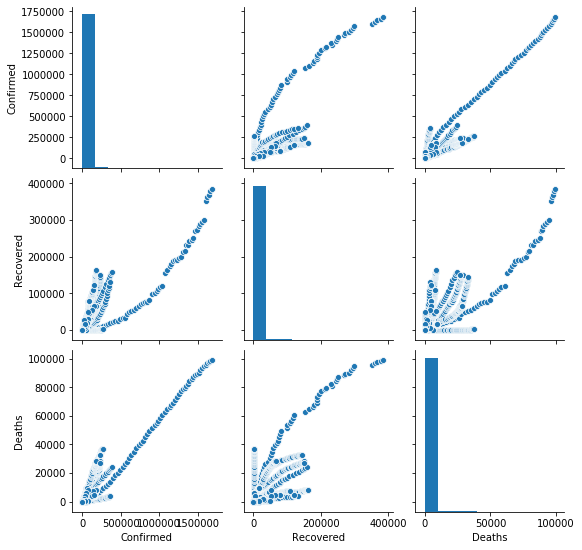

In [63]:
sns.pairplot(df_new)

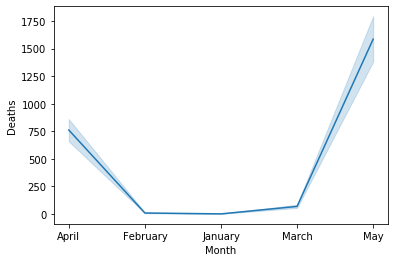

In [65]:
sns.lineplot(x = df_new["Month"] , y=df_new["Deaths"] )

In [66]:
df= df_new

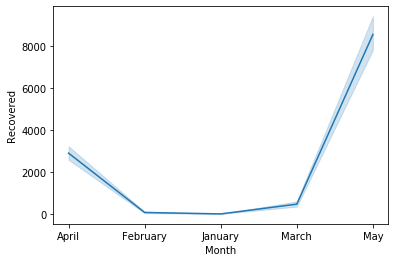

In [69]:
sns.lineplot(x = df["Month"] , y=df["Recovered"] )

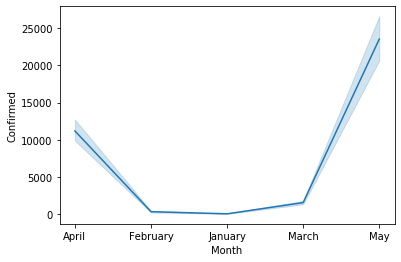

In [71]:
sns.lineplot(x = df["Month"] , y=df["Confirmed"] )

In [72]:
df.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


All the cases (Recovered & Death) are increasing with the increase in number of confirmed cases.

# Using Label Encoder

In [74]:
df.columns

Index(['Month', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [77]:
# Conveting Non numeric values to numeric for analysis purpose

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'].astype(str))
df['Month'] = le.fit_transform(df['Month'].astype(str))

In [78]:
df

,Month,Country,Confirmed,Recovered,Deaths
0,2,0,0,0,0
1,2,1,0,0,0
2,2,100,0,0,0
3,2,111,0,0,0
4,2,122,0,0,0
...,...,...,...,...,...
23683,4,94,429,365,3
23684,4,95,9,6,1
23685,4,96,249,10,49
23686,4,97,920,336,7


# Finding and Removing Outliers

In [79]:
df.shape

(23688, 5)

In [82]:
col_list = df.columns.values

ncols = 12
nrows = 10

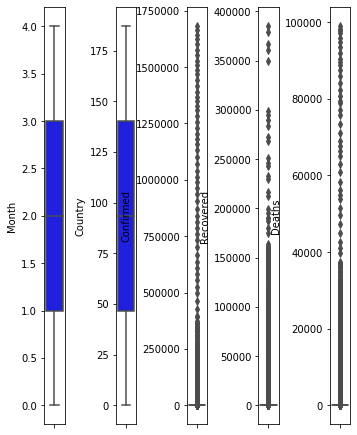

In [83]:

plt.figure(figsize = (ncols, 5*ncols))
for i in range( 0 , len(col_list)):
    plt.subplot(nrows , ncols , i+1)
    sns.boxplot(df[col_list[i]] , color = 'blue' , orient = 'v')
    plt.tight_layout()

In [84]:
from scipy.stats import zscore


z = np.abs(zscore(df))

df_new = df[(z<3).all(axis = 1) ]

df_new

,Month,Country,Confirmed,Recovered,Deaths
0,2,0,0,0,0
1,2,1,0,0,0
2,2,100,0,0,0
3,2,111,0,0,0
4,2,122,0,0,0
...,...,...,...,...,...
23683,4,94,429,365,3
23684,4,95,9,6,1
23685,4,96,249,10,49
23686,4,97,920,336,7


In [86]:
df.shape , df_new.shape 

# We can see that outliers are removed from the new dataframe df_new

((23688, 5), (23177, 5))

In [95]:
# Separating attributes from Target variable for train_test_split

x1 = df_new.iloc[: , 0:-1]

x1

,Month,Country,Confirmed,Recovered
0,2,0,0,0
1,2,1,0,0
2,2,100,0,0
3,2,111,0,0
4,2,122,0,0
...,...,...,...,...
23683,4,94,429,365
23684,4,95,9,6
23685,4,96,249,10
23686,4,97,920,336


In [96]:
x1.shape

(23177, 4)

In [97]:
# Separating Target variable from attribute for train_test_split
y = df_new.iloc[:,-1]

y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23177, dtype: int64

In [100]:
x = x1
x.shape , y.shape

((23177, 4), (23177, 1))

# Data Analysis - Linear Regression

In [102]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


def maxr2_score(regr, x, y):
    max_r_score = 0
    for r_state in range(42 , 100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state , test_size = 0.20)
        regr.fit(x_train , y_train)
        y_pred = regr.predict(x_test)
        r2_scr  = r2_score(y_test, y_pred)
        if r2_scr > max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("Max r2 score corresponding to ", final_r_state , " is " , max_r_score)
    return(final_r_state)

In [103]:
from sklearn.linear_model import LinearRegression 

lreg = LinearRegression()


r_state = maxr2_score(lreg,x,y)

Max r2 score corresponding to  80  is  0.6369001791737138


In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors = {"n_neighbors" : range(1,30)}

knr = KNeighborsRegressor()
gknr = GridSearchCV(knr , neighbors , cv = 10)
gknr.fit(x,y)
gknr.best_params_


{'n_neighbors': 9}

In [105]:
knr = KNeighborsRegressor(n_neighbors = 9 )

r_state = maxr2_score(knr,x,y)

Max r2 score corresponding to  92  is  0.7814350764514227


In [106]:
#Lets check mean r2 score of both Linear regression model and knr

from sklearn.model_selection import cross_val_score

cv_score_lreg = cross_val_score(lreg ,x , y , cv = 5 , scoring = "r2")
cv_score_knr  = cross_val_score(knr ,x , y , cv = 5 , scoring = "r2")

print("Linear Regression\nCV_score:", cv_score_lreg , "\nMean r2 score :" ,cv_score_lreg.mean() , "\nStd :",cv_score_lreg.std() )
print("\nKNeighbors Regressor\nCV_score:", cv_score_knr , "\nMean r2 score :" ,cv_score_knr.mean() , "\nStd :",cv_score_knr.std() )

Linear Regression
CV_score: [-0.73837754  0.60233853  0.69346512  0.55749591  0.50128706] 
Mean r2 score : 0.3232418175487384 
Std : 0.5345224092368517

KNeighbors Regressor
CV_score: [-0.29608606 -0.05292664  0.42107634  0.39707516  0.51784662] 
Mean r2 score : 0.19739708432215697 
Std : 0.31584148869222606


In [107]:
# Lasso Regression

from sklearn.linear_model import Lasso

ls = Lasso()
parameters = {"alpha" : [0.001 , 0.01 , 0.1 , 1]}
gs = GridSearchCV(ls , parameters , cv = 10)
gs.fit(x,y)
gs.best_params_


{'alpha': 0.001}

In [108]:
ls = Lasso(alpha = 0.001)
    
r_state = maxr2_score(ls,x,y)

Max r2 score corresponding to  80  is  0.6369001512028


In [109]:
cv_score_ls = cross_val_score(ls ,x , y , cv = 5 , scoring = "r2")
print("Lasso Regression\nCV_score:", cv_score_ls , "\nMean r2 score :" ,cv_score_ls.mean() , "\nStd :",cv_score_ls.std() )

Lasso Regression
CV_score: [-0.73837877  0.60233897  0.6934651   0.55749601  0.5012872 ] 
Mean r2 score : 0.3232417017789354 
Std : 0.5345229551028245


# Gradient Boosting Method

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
parameters = { "learning_rate" : [0.001 , 0.01 , 0.1 , 1] , "n_estimators" : [10 , 100 , 500 , 1000]}
gs = GridSearchCV(gbr , parameters , cv =5)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [111]:
gbr = GradientBoostingRegressor(learning_rate = 0.1 ,n_estimators = 500 )

r_state = maxr2_score(gbr,x,y)

Max r2 score corresponding to  76  is  0.9671005136570889


In [112]:
cv_score_gbr = cross_val_score(gbr ,x , y , cv = 5 , scoring = "r2")
print("Lasso Regression\nCV_score:", cv_score_gbr , "\nMean r2 score :" ,cv_score_gbr.mean() , "\nStd :",cv_score_gbr.std() )

Lasso Regression
CV_score: [0.14982094 0.51753219 0.39903837 0.68610217 0.63290791] 
Mean r2 score : 0.4770803163962638 
Std : 0.19120563707333912


In [116]:
# Best score is with KneighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 28)

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 88 , test_size = 0.20)

gbr.fit(x_train,y_train)
pred = gbr.predict(x_test)
r2score = r2_score(y_test,pred)

r2score

0.9135889929530818

In [117]:
gbr.predict(x_test)

array([-0.07075291, 34.80251773,  7.22176762, ..., -1.55402451,
       -0.61205696,  0.05005304])

In [118]:
from sklearn.externals import joblib

# Save the model as a object file

joblib.dump(gbr , 'Covid.obj')

#Load the model from the file

dtc_from_joblib = joblib.load('Covid.obj')

# Use the loaded model to make predictions

dtc_from_joblib.predict(x_test)

array([-0.07075291, 34.80251773,  7.22176762, ..., -1.55402451,
       -0.61205696,  0.05005304])